In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv("/content/BIKE DETAILS.csv")
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


In [5]:
df.columns


Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

1. What is the range of selling prices in the dataset?

In [10]:
df["selling_price"].min()


5000

In [8]:
df["selling_price"].max()

760000

-#hence the range is  5000- 760000

2.What is the median selling price for bikes in the dataset

In [12]:
df["selling_price"].median()

45000.0

3.What is the most common seller type?

In [23]:
df["selling_price"].value_counts().short(ascenting=False)

AttributeError: 'Series' object has no attribute 'shoting'

4. How many bikes have driven more than 50,000 kilometers?


In [27]:
(df["km_driven"]>50000).value_counts()

,count
km_driven,
False,891
True,170


5. What is the average km_driven value for each ownership type?

In [31]:
df.groupby("owner") ["km_driven"].mean()

,km_driven
owner,
1st owner,32816.583333
2nd owner,39288.991870
3rd owner,33292.181818
4th owner,311500.000000


6.  What proportion of bikes are from the year 2015 or older?


In [35]:
(df["year"]>=2015).value_counts(normalize = True)

,proportion
year,
True,0.527804
False,0.472196


7. What is the trend of missing values across the dataset?

In [37]:
df.isnull().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


7.What is the highest ex_showroom_price recorded, and for which bike

In [43]:
df["ex_showroom_price"].idxmax()


134

In [52]:
df.iloc[134,0]

'Harley-Davidson Street Bob'

8. What is the total number of bikes listed by each seller type?

In [54]:
df
df["seller_type"].value_counts()


,count
seller_type,
Individual,1055
Dealer,6


10. What is the relationship between selling_price and km_driven for first-owner bikes

In [62]:

correlation= df.corr(numeric_only=True)
result = correlation["selling_price"]["km_driven"]
print(result)

-0.21293670714453689


11. Identify and remove outliers in the km_driven column using the IQR method

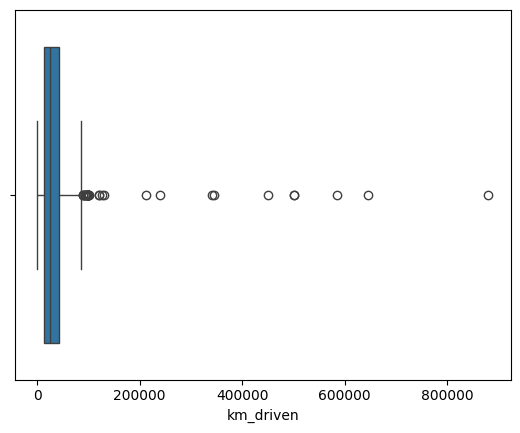

In [63]:
sns.boxplot(x=df["km_driven"],data= df)
plt.show()

In [70]:
Q1=df["km_driven"].quantile(0.25)
Q3=df["km_driven"].quantile(0.75)
IQR=Q3-Q1
df["km_driven"] = (df["km_driven"]>=(Q1-1.5*IQR)) & (df["km_driven"]<=(Q3+1.5*IQR))
sns.boxplot(x=df["km_driven"],data= df)
plt.show()


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

12.  Perform a bivariate analysis to visualize the relationship between year and selling_price?

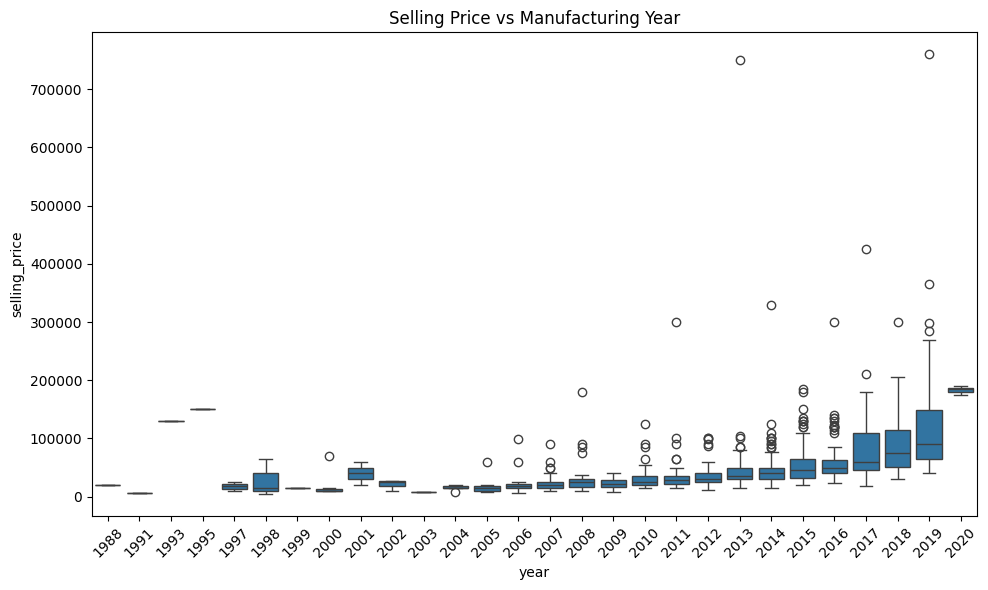

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='selling_price', data=df)
plt.xticks(rotation=45)
plt.title('Selling Price vs Manufacturing Year')
plt.tight_layout()
plt.show()

13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing
year)?

In [72]:
from datetime import datetime


current_year = datetime.now().year

df['age'] = current_year - df['year']

df_depreciation = df.dropna(subset=['ex_showroom_price'])

df_depreciation['depreciation_per_year'] = (
    (df_depreciation['ex_showroom_price'] - df_depreciation['selling_price']) / df_depreciation['age']
)

average_depreciation = df_depreciation['depreciation_per_year'].mean()
print("Average depreciation per year (INR):", round(average_depreciation, 2))


Average depreciation per year (INR): 2666.56


14. Which bike names are priced significantly above the average price for their manufacturing year?

In [73]:

year_avg_price = df.groupby('year')['selling_price'].mean().reset_index()
year_avg_price.columns = ['year', 'avg_year_price']

df = pd.merge(df, year_avg_price, on='year')

df_above_avg = df[df['selling_price'] > 1.5 * df['avg_year_price']]

df_above_avg[['name', 'year', 'selling_price', 'avg_year_price']]


,name,year,selling_price,avg_year_price
2,Royal Enfield Classic Gunmetal Grey,2018,150000,87660.374046
7,Royal Enfield Bullet 350 [2007-2011],2008,180000,34289.285714
13,Yamaha YZF R3,2019,365000,119689.511628
18,Royal Enfield Classic Gunmetal Grey,2018,150000,87660.374046
23,Jawa Standard,2019,180000,119689.511628
...,...,...,...,...
979,Royal Enfield Thunder 500,2015,105000,56500.000000
981,Royal Enfield Thunder 350,2013,105000,51136.986301
983,Royal Enfield Classic 350,2015,100000,56500.000000
984,Royal Enfield Classic 500,2014,95000,48668.131868


15.  Develop a correlation matrix for numeric columns and visualize it using a heatmap?

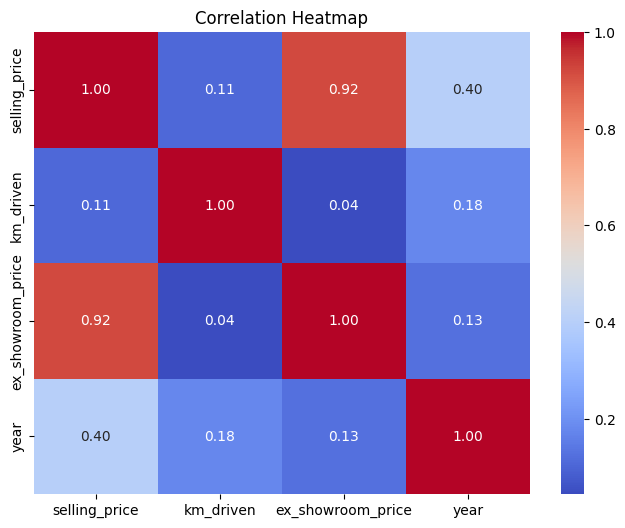

In [74]:

numeric_df = df[['selling_price', 'km_driven', 'ex_showroom_price', 'year']]
corr_matrix = numeric_df.corr()


plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()